<a href="https://colab.research.google.com/github/ghdakrk/ML/blob/main/bagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

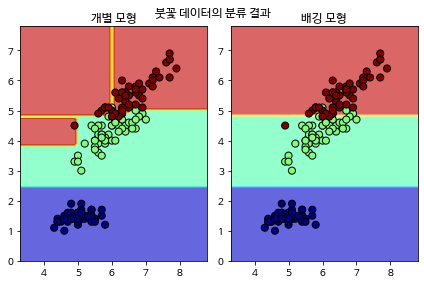

In [4]:
# 같은 모형 다른데이터 사용, 다른피쳐사용
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
import numpy as np
import matplotlib as mpl

iris = load_iris()
X, y = iris.data[:, [0,2]], iris.target

model1 = DecisionTreeClassifier(max_depth=10, random_state=0).fit(X, y)
model2 = BaggingClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=100, random_state=0).fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
plt.subplot(121)
Z1 = model1.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z1, alpha=0.6, cmap=mpl.cm.jet)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, s=50, cmap=mpl.cm.jet, edgecolors="k")
plt.title("개별 모형")
plt.subplot(122)
Z2 = model2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z2, alpha=0.6, cmap=mpl.cm.jet)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, s=50, cmap=mpl.cm.jet, edgecolors="k")
plt.title("배깅 모형")
plt.suptitle("붓꽃 데이터의 분류 결과")
plt.tight_layout()
plt.show()

In [22]:
# 배깅을 이용해 유방암 진단 예측모델 만들기
from sklearn.datasets import load_breast_cancer

bc = load_breast_cancer()
X = bc.data
y = bc.target

model1 = DecisionTreeClassifier(max_depth=10).fit(X, y)
model2 = BaggingClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=100, random_state=0).fit(X, y)

from sklearn.model_selection import cross_val_score

cv = KFold(5, shuffle=True, random_state=0)
acc1 = cross_val_score(model1, X, y, scoring='accuracy', cv=cv)
acc2 = cross_val_score(model2, X, y, scoring='accuracy', cv=cv)
acc1.mean(), acc1.std(), acc2.mean(), acc2.std()
# 정확도 평균값은 올라가고 표준편차는 줄어들음을 알 수 있다.

(0.9209594783418724,
 0.01909126297070833,
 0.9543549138332557,
 0.01784262116534731)

In [13]:
import pandas as pd
df = pd.DataFrame(X, columns=bc.feature_names)
df['answer'] = y
df.tail(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,answer
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [23]:
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings(action='ignore')

bc = load_breast_cancer()
X = bc.data
y = bc.target

model1 = LogisticRegression(random_state=1).fit(X, y)
model2 = BaggingClassifier(LogisticRegression(random_state=1), n_estimators=200, random_state=0).fit(X, y)

from sklearn.model_selection import cross_val_score


cv = KFold(5, shuffle=True, random_state=0)
acc1 = cross_val_score(model1, X, y, scoring='accuracy', cv=cv)
acc2 = cross_val_score(model2, X, y, scoring='accuracy', cv=cv)
acc1.mean(), acc1.std(), acc2.mean(), acc2.std()
# 정확도 평균값은 올라가고 표준편차는 줄어들음을 알 수 있다.

(0.9420586865393572,
 0.03863821776041241,
 0.9490917559385188,
 0.030554971761775792)